In [279]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import log_loss

In [280]:
df = pd.read_csv('~/cardio_train.csv', sep = ';')

In [281]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [282]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


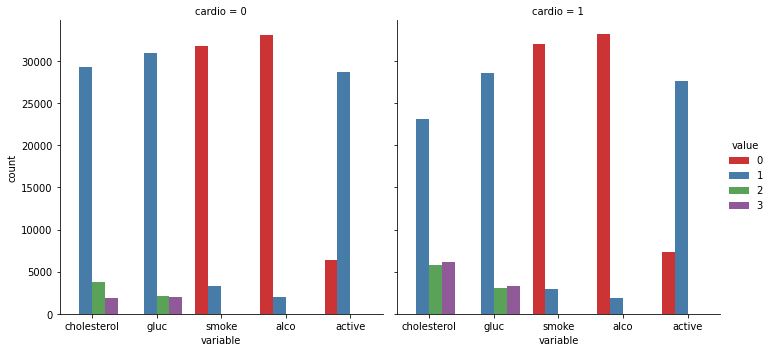

In [283]:
#Plotting to see how much of an impact the categorical variables have on the output classes

df_analysis = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])

sns.catplot(x="variable", hue="value", col="cardio",
                data=df_analysis, kind="count", palette="Set1")


In [284]:
df.duplicated().values.any()

False

In [285]:
df.isnull().values.any()

False

In [286]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [291]:
# Removing outliers in height and weight 
# I assumed the outliers to be <2 percentile and >98 percentile

df.drop(df[(df['height'] > df['height'].quantile(0.98)) | (df['height'] < df['height'].quantile(0.020))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.98)) | (df['weight'] < df['weight'].quantile(0.020))].index,inplace=True)


In [288]:
df[df['ap_lo']> df['ap_hi']]  # diastolic blood pressure cannot be higher than systolic bp, so removing those that are higher

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
473,680,15226,1,150,95.0,150,1033,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


In [292]:
#There were some negative values of both bp's which is not possible
#First I thought, it was probably a mistake and taking the absolute value should fix it

#df['ap_hi'] = df['ap_hi'].apply(lambda x : abs(x) if x < 0 else x)
#df['ap_lo'] = df['ap_lo'].apply(lambda x : abs(x) if x < 0 else x)

In [293]:
# Instead I decided to remove them altogether

df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.98)) | (df['ap_hi'] < df['ap_hi'].quantile(0.020))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.98)) | (df['ap_lo'] < df['ap_lo'].quantile(0.020))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


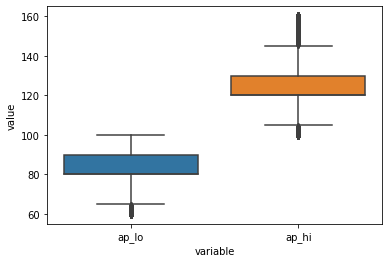

In [294]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

In [295]:
df.drop("id",axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast = 'integer')
df['Cardio'] = df['cardio']
df = df.drop('age', axis = 1)
df = df.drop('cardio', axis = 1)

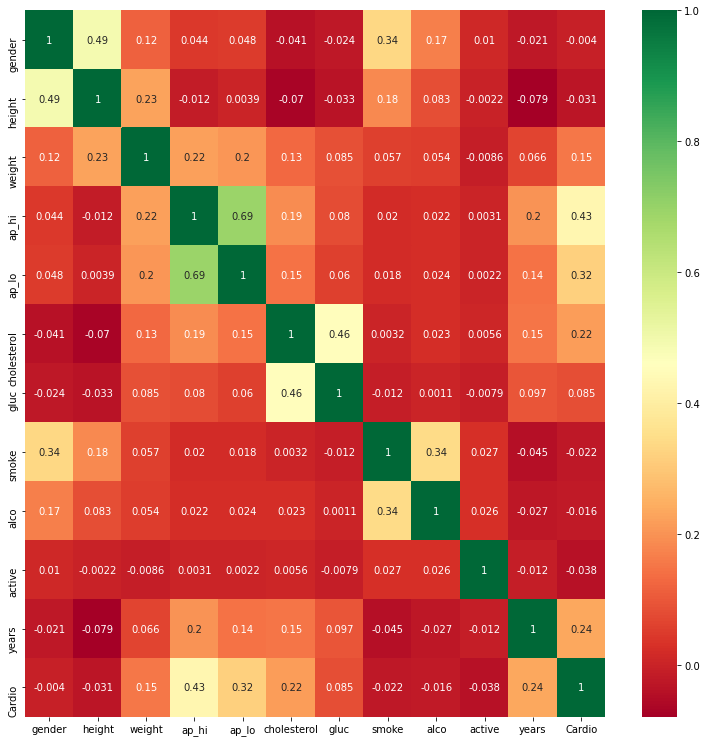

In [296]:
correlation_mat = df.corr()
top_corr_features = correlation_mat.index
plt.figure(figsize=(13,13))

g = sns.heatmap(df[top_corr_features].corr(), annot=True,cmap='RdYlGn')

In [297]:
df=df.drop(['alco'], axis=1) 

#I tried to remove the features that were negatively impacting the model using the correlation matrix 
#But some made the accuracy go down
#Removing alcohol made it go up by a slight amount

In [298]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,years,Cardio
0,2,168,62.0,110,80,1,1,0,1,50,0
1,1,156,85.0,140,90,3,1,0,1,55,1
2,1,165,64.0,130,70,3,1,0,0,52,1
3,2,169,82.0,150,100,1,1,0,1,48,1
4,1,156,56.0,100,60,1,1,0,0,48,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,1,54,1
69994,1,165,80.0,150,80,1,1,0,1,58,1
69995,2,168,76.0,120,80,1,1,1,1,53,0
69998,1,163,72.0,135,80,1,2,0,0,61,1


In [299]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [300]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 4000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=4000)

In [301]:
y_preds = model.predict(X_test)
print(accuracy_score(Y_test, y_preds))

0.7216024696555111


Logistic Regression accuracy:  0.7216024696555111


[[5794 1571]
 [2397 4491]]


/home/adi/venv1/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


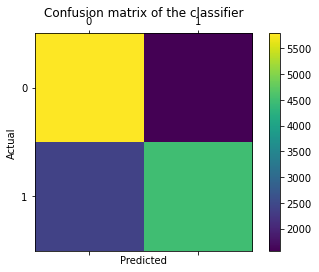



              precision    recall  f1-score   support

           0       0.71      0.79      0.74      7365
           1       0.74      0.65      0.69      6888

    accuracy                           0.72     14253
   macro avg       0.72      0.72      0.72     14253
weighted avg       0.72      0.72      0.72     14253



In [302]:
y_preds = model.predict(X_test)
print('Logistic Regression accuracy: ',accuracy_score(Y_test, y_preds))
print('\n')
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(Y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(Y_test, y_preds))

In [303]:
from sklearn.ensemble import GradientBoostingClassifier

Grad_Boost = GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_depth=1, verbose = True)
Grad_Boost.fit(X_train,Y_train)
Grad_Boost.score(X_test, Y_test)

      Iter       Train Loss   Remaining Time 
         1           1.2052           13.48s
         2           1.1834           13.32s
         3           1.1677           13.57s
         4           1.1556           13.08s
         5           1.1496           12.62s
         6           1.1451           12.21s
         7           1.1418           11.86s
         8           1.1399           11.73s
         9           1.1379           11.65s
        10           1.1356           11.83s
        20           1.1218           11.00s
        30           1.1183           11.12s
        40           1.1172           10.51s
        50           1.1165           10.23s
        60           1.1160           10.01s
        70           1.1157            9.67s
        80           1.1154            9.45s
        90           1.1152            9.19s
       100           1.1150            8.94s
       200           1.1142            6.54s
       300           1.1140            4.26s
       40

0.7244088963726935

Gradient Boosting accuracy:  0.7244088963726935


[[5912 1453]
 [2475 4413]]


/home/adi/venv1/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


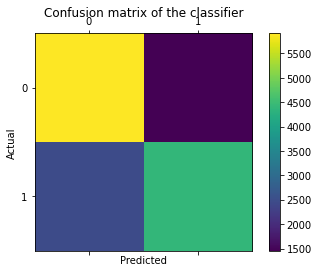



              precision    recall  f1-score   support

           0       0.70      0.80      0.75      7365
           1       0.75      0.64      0.69      6888

    accuracy                           0.72     14253
   macro avg       0.73      0.72      0.72     14253
weighted avg       0.73      0.72      0.72     14253



In [304]:
y_preds = Grad_Boost.predict(X_test)
print('Gradient Boosting accuracy: ',accuracy_score(Y_test, y_preds))
print('\n')
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(Y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(Y_test, y_preds))

In [305]:
import xgboost as xgb #ExtremeGradientBoosting - best accuracy so far in any model

In [306]:
XGB_Classifier = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=400,
                        learning_rate = 0.0001)
eval_set = [(X_train, Y_train), (X_test, Y_test)]
XGB_Classifier.fit(X_train, Y_train.ravel(), early_stopping_rounds=5, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)



[0]	validation_0-error:0.27586	validation_0-logloss:0.69310	validation_1-error:0.29797	validation_1-logloss:0.69313
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 5 rounds.
[1]	validation_0-error:0.26120	validation_0-logloss:0.69307	validation_1-error:0.29025	validation_1-logloss:0.69310
[2]	validation_0-error:0.25666	validation_0-logloss:0.69304	validation_1-error:0.28429	validation_1-logloss:0.69307
[3]	validation_0-error:0.25406	validation_0-logloss:0.69302	validation_1-error:0.28289	validation_1-logloss:0.69305
[4]	validation_0-error:0.25156	validation_0-logloss:0.69301	validation_1-error:0.28015	validation_1-logloss:0.69302
[5]	validation_0-error:0.25133	validation_0-logloss:0.69299	validation_1-error:0.27650	validation_1-logloss:0.69299
[6]	validation_0-error:0.24866	validation_0-logloss:0.69296	validation_1-error:0.27952	validation_1-logloss:0.69297
[7]	validation_0-error:0

[69]	validation_0-error:0.24635	validation_0-logloss:0.69119	validation_1-error:0.27524	validation_1-logloss:0.69140
[70]	validation_0-error:0.24637	validation_0-logloss:0.69117	validation_1-error:0.27531	validation_1-logloss:0.69137
[71]	validation_0-error:0.24642	validation_0-logloss:0.69114	validation_1-error:0.27538	validation_1-logloss:0.69135
[72]	validation_0-error:0.24651	validation_0-logloss:0.69111	validation_1-error:0.27517	validation_1-logloss:0.69132
[73]	validation_0-error:0.24651	validation_0-logloss:0.69108	validation_1-error:0.27517	validation_1-logloss:0.69130
[74]	validation_0-error:0.24618	validation_0-logloss:0.69105	validation_1-error:0.27468	validation_1-logloss:0.69127
[75]	validation_0-error:0.24651	validation_0-logloss:0.69102	validation_1-error:0.27482	validation_1-logloss:0.69125
[76]	validation_0-error:0.24667	validation_0-logloss:0.69100	validation_1-error:0.27489	validation_1-logloss:0.69122
[77]	validation_0-error:0.24656	validation_0-logloss:0.69097	val

[139]	validation_0-error:0.24508	validation_0-logloss:0.68926	validation_1-error:0.27419	validation_1-logloss:0.68967
[140]	validation_0-error:0.24511	validation_0-logloss:0.68924	validation_1-error:0.27412	validation_1-logloss:0.68964
[141]	validation_0-error:0.24499	validation_0-logloss:0.68921	validation_1-error:0.27426	validation_1-logloss:0.68962
[142]	validation_0-error:0.24511	validation_0-logloss:0.68918	validation_1-error:0.27419	validation_1-logloss:0.68959
[143]	validation_0-error:0.24525	validation_0-logloss:0.68915	validation_1-error:0.27412	validation_1-logloss:0.68957
[144]	validation_0-error:0.24515	validation_0-logloss:0.68912	validation_1-error:0.27412	validation_1-logloss:0.68954
[145]	validation_0-error:0.24522	validation_0-logloss:0.68910	validation_1-error:0.27426	validation_1-logloss:0.68952
[146]	validation_0-error:0.24518	validation_0-logloss:0.68907	validation_1-error:0.27412	validation_1-logloss:0.68950
[147]	validation_0-error:0.24522	validation_0-logloss:0.

[209]	validation_0-error:0.24518	validation_0-logloss:0.68736	validation_1-error:0.27426	validation_1-logloss:0.68796
[210]	validation_0-error:0.24513	validation_0-logloss:0.68733	validation_1-error:0.27412	validation_1-logloss:0.68794
[211]	validation_0-error:0.24529	validation_0-logloss:0.68730	validation_1-error:0.27412	validation_1-logloss:0.68791
[212]	validation_0-error:0.24529	validation_0-logloss:0.68728	validation_1-error:0.27426	validation_1-logloss:0.68789
[213]	validation_0-error:0.24534	validation_0-logloss:0.68725	validation_1-error:0.27447	validation_1-logloss:0.68786
[214]	validation_0-error:0.24513	validation_0-logloss:0.68722	validation_1-error:0.27468	validation_1-logloss:0.68784
[215]	validation_0-error:0.24534	validation_0-logloss:0.68720	validation_1-error:0.27475	validation_1-logloss:0.68781
[216]	validation_0-error:0.24539	validation_0-logloss:0.68717	validation_1-error:0.27482	validation_1-logloss:0.68779
[217]	validation_0-error:0.24557	validation_0-logloss:0.

[279]	validation_0-error:0.24504	validation_0-logloss:0.68547	validation_1-error:0.27440	validation_1-logloss:0.68628
[280]	validation_0-error:0.24499	validation_0-logloss:0.68545	validation_1-error:0.27412	validation_1-logloss:0.68625
[281]	validation_0-error:0.24506	validation_0-logloss:0.68542	validation_1-error:0.27426	validation_1-logloss:0.68623
[282]	validation_0-error:0.24494	validation_0-logloss:0.68539	validation_1-error:0.27419	validation_1-logloss:0.68621
[283]	validation_0-error:0.24499	validation_0-logloss:0.68537	validation_1-error:0.27419	validation_1-logloss:0.68618
[284]	validation_0-error:0.24494	validation_0-logloss:0.68534	validation_1-error:0.27426	validation_1-logloss:0.68616
[285]	validation_0-error:0.24492	validation_0-logloss:0.68531	validation_1-error:0.27433	validation_1-logloss:0.68614
[286]	validation_0-error:0.24508	validation_0-logloss:0.68529	validation_1-error:0.27447	validation_1-logloss:0.68611
[287]	validation_0-error:0.24497	validation_0-logloss:0.

[349]	validation_0-error:0.24487	validation_0-logloss:0.68362	validation_1-error:0.27447	validation_1-logloss:0.68462
[350]	validation_0-error:0.24487	validation_0-logloss:0.68359	validation_1-error:0.27419	validation_1-logloss:0.68460
[351]	validation_0-error:0.24476	validation_0-logloss:0.68356	validation_1-error:0.27433	validation_1-logloss:0.68458
[352]	validation_0-error:0.24480	validation_0-logloss:0.68354	validation_1-error:0.27405	validation_1-logloss:0.68455
[353]	validation_0-error:0.24478	validation_0-logloss:0.68351	validation_1-error:0.27419	validation_1-logloss:0.68453
[354]	validation_0-error:0.24480	validation_0-logloss:0.68349	validation_1-error:0.27419	validation_1-logloss:0.68451
[355]	validation_0-error:0.24497	validation_0-logloss:0.68346	validation_1-error:0.27433	validation_1-logloss:0.68448
[356]	validation_0-error:0.24504	validation_0-logloss:0.68343	validation_1-error:0.27419	validation_1-logloss:0.68446
[357]	validation_0-error:0.24494	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.33,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [307]:
XGB_Classifier.score(X_test,Y_test) 

0.7249000210482004

XGB accuracy:  0.7249000210482004


[[5735 1630]
 [2291 4597]]


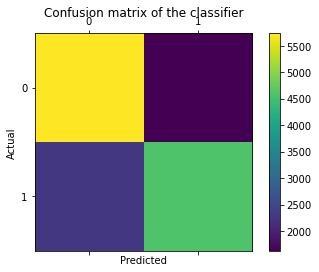



              precision    recall  f1-score   support

           0       0.71      0.78      0.75      7365
           1       0.74      0.67      0.70      6888

    accuracy                           0.72     14253
   macro avg       0.73      0.72      0.72     14253
weighted avg       0.73      0.72      0.72     14253



In [308]:
y_preds = XGB_Classifier.predict(X_test)
print('XGB accuracy: ',accuracy_score(Y_test, y_preds))
print('\n')
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(Y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(Y_test, y_preds))

In [309]:
from sklearn.ensemble import AdaBoostClassifier

In [310]:
AdaBoost_classifier = AdaBoostClassifier(n_estimators=500)
AdaBoost_classifier.fit(X_train,Y_train)
AdaBoost_classifier.score(X_test, Y_test)

0.7239177716971865

In [311]:
from sklearn.ensemble import BaggingClassifier

In [312]:
Bag = BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
Bag.fit(X_train,Y_train)
Bag.score(X_test, Y_test)

0.7002034659369957

In [313]:
from sklearn.naive_bayes import MultinomialNB

In [314]:
NB = MultinomialNB()
NB.fit(X_train,Y_train)
NB.score(X_test, Y_test)

0.702378446642812

In [315]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=3, min_samples_leaf=5)
DT.fit(X_train,Y_train)
DT.score(X_test, Y_test)

0.7183750789307515

In [316]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
RF.score(X_test, Y_test)

0.6964147898687996